In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
file_path = 'D:/BCI_RL/important/ErrP/DMD/code/IncDMD/'
sub = ['1', '2', '3', '4', '5', '6']
ses = ['1', '2']
file_name = file_path+'Subject0'+sub[2]+'_s'+ses[0]+'.mat'

epoch_eeg = scipy.io.loadmat(file_name)['errorTrial']
print(epoch_eeg.shape)   

(64, 200, 99)


In [3]:
import math 

trial = epoch_eeg[:,:,3]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

7
(448, 194)


In [4]:
# stdDMD for feature vector
from pydmd import DMD

dmd = DMD(svd_rank=0, exact=True)    

dt = 1/ 200
dmd.fit(aug_trial)

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 447782435.0809899. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


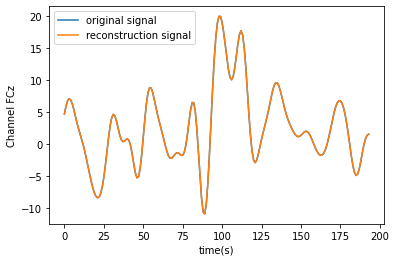

In [5]:
# DMD property
recon_trial = dmd.reconstructed_data

plt.plot(aug_trial[46], label='original signal')
plt.plot(recon_trial[46].real, label='reconstruction signal')
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('Channel FCz')
plt.show()

In [8]:
dmd_f = dmd.frequency
dmd_phi = dmd.modes
dmd_dynamic = dmd.dynamics
dmd_b = dmd.amplitudes

dt = 1 / 200
print(dmd_f / dt)
print(dmd_f.size)

[ 63.741199   -63.741199    50.01682717 -50.01682717  51.76482533
 -51.76482533  43.20671858 -43.20671858  37.2070405  -37.2070405
  35.79549962 -35.79549962  35.19844076 -35.19844076  33.18062089
 -33.18062089  31.43242237 -31.43242237  29.72754386 -29.72754386
  29.09272688 -29.09272688  27.30997839 -27.30997839  25.99779342
 -25.99779342  25.11269508 -25.11269508  23.39397001 -23.39397001
  20.80777055 -20.80777055  20.25157804 -20.25157804  19.74178701
 -19.74178701  19.0713478  -19.0713478   17.78957467 -17.78957467
  18.23276022 -18.23276022  17.07187284 -17.07187284  16.22734534
 -16.22734534  15.23185543 -15.23185543  14.45343642 -14.45343642
  13.54415399 -13.54415399  12.89694902 -12.89694902  11.34167708
 -11.34167708  10.12622014 -10.12622014   5.55365786  -5.55365786
   9.04550314  -9.04550314   0.           7.95244051  -7.95244051
   7.65383397  -7.65383397   0.97793116  -0.97793116  12.30718943
 -12.30718943   2.14039317  -2.14039317   6.21847191  -6.21847191
   3.055605

In [9]:
print(dmd.operator.Lambda)

[-3.80740469e-01+0.82649089j -3.80740469e-01-0.82649089j
 -5.28664236e-04+1.00004363j -5.28664236e-04-1.00004363j
 -4.92183394e-02+0.88680888j -4.92183394e-02-0.88680888j
  1.89669693e-01+0.8751931j   1.89669693e-01-0.8751931j
  3.78325712e-01+0.89009895j  3.78325712e-01-0.89009895j
  4.11224784e-01+0.85952007j  4.11224784e-01-0.85952007j
  4.39365188e-01+0.87575716j  4.39365188e-01-0.87575716j
  4.91312877e-01+0.841628j    4.91312877e-01-0.841628j
  5.48056749e-01+0.830489j    5.48056749e-01-0.830489j
  5.81145344e-01+0.78564752j  5.81145344e-01-0.78564752j
  6.02176827e-01+0.78100902j  6.02176827e-01-0.78100902j
  6.44356297e-01+0.74538759j  6.44356297e-01-0.74538759j
  6.73408339e-01+0.71700743j  6.73408339e-01-0.71700743j
  7.01442277e-01+0.70642675j  7.01442277e-01-0.70642675j
  7.40841494e-01+0.6696165j   7.40841494e-01-0.6696165j
  7.94470206e-01+0.60860537j  7.94470206e-01-0.60860537j
  8.00278254e-01+0.59115601j  8.00278254e-01-0.59115601j
  8.14186878e-01+0.58150924j  8.14186

In [10]:
# dt不对，导致f显示不对，但其实对重构数据没有影响

In [11]:
print(dmd_b)   # b一致，则Phi一致

[ 3.83368746e-04+1.59045708e-03j  3.83368746e-04-1.59045708e-03j
 -2.42153912e-03+9.00251338e-04j -2.42153912e-03-9.00251338e-04j
  6.14287691e-04+2.53514280e-03j  6.14287691e-04-2.53514280e-03j
 -3.65322951e-05-2.95343764e-03j -3.65322952e-05+2.95343764e-03j
  1.45515424e-03+5.53329545e-04j  1.45515424e-03-5.53329545e-04j
  4.22753735e-03-7.53331946e-04j  4.22753735e-03+7.53331945e-04j
  1.92388469e-04+1.57730796e-03j  1.92388469e-04-1.57730796e-03j
 -1.12849427e-04+4.81736818e-04j -1.12849428e-04-4.81736818e-04j
 -6.64027748e-05-2.13605325e-03j -6.64027746e-05+2.13605325e-03j
  1.43972165e-03-1.03566161e-04j  1.43972165e-03+1.03566161e-04j
  7.02796885e-04+2.51685597e-03j  7.02796885e-04-2.51685597e-03j
  1.20927828e-03-3.03937393e-03j  1.20927828e-03+3.03937393e-03j
  7.81828099e-03-4.18152100e-03j  7.81828099e-03+4.18152100e-03j
  3.50163864e-03+6.77671752e-04j  3.50163864e-03-6.77671752e-04j
 -3.82653104e-03+2.01743788e-03j -3.82653104e-03-2.01743788e-03j
  3.04362495e-01+3.973135

In [12]:
print(np.dot(dmd_phi,dmd_phi.T))

[[-0.43116366-3.87859356e-18j -0.03259184-1.19097830e-18j
  -0.0385642 -1.45910925e-18j ...  0.10671279-2.24158763e-19j
   0.05329893+3.82658036e-19j  0.12576159+1.64129580e-18j]
 [-0.03259184-1.19097830e-18j -0.00179036+4.08011406e-19j
  -0.00253259+3.10505607e-20j ...  0.0205499 -4.06400871e-19j
   0.00135771+9.24092340e-19j  0.01181026+6.32957907e-20j]
 [-0.0385642 -1.45910925e-18j -0.00253259+3.10505607e-20j
   0.02661861+1.10696672e-18j ... -0.02429553-3.70950498e-19j
  -0.00505311+6.86352205e-19j -0.01241649-6.51109458e-19j]
 ...
 [ 0.10671279-2.24158763e-19j  0.0205499 -4.06400871e-19j
  -0.02429553-3.70950498e-19j ... -0.04171556-5.36563762e-19j
  -0.02308564-6.75834493e-19j -0.03972867+1.02998782e-18j]
 [ 0.05329893+3.82658036e-19j  0.00135771+9.24092340e-19j
  -0.00505311+6.86352205e-19j ... -0.02308564-6.75834493e-19j
  -0.28659645+4.06682994e-19j -0.03582308+5.46989549e-19j]
 [ 0.12576159+1.64129580e-18j  0.01181026+6.32957907e-20j
  -0.01241649-6.51109458e-19j ... -0.03972

In [13]:
print(aug_trial.shape)

(448, 194)
